In [ ]:
# Step : Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


In [38]:
from google.colab import files
uploaded = files.upload()


Saving processed_dataset.xlsx to processed_dataset (4).xlsx


In [ ]:
import pandas as pd

# Use read_excel, not read_xlsx
data = pd.read_excel("processed_dataset.xlsx")

print("Dataset loaded successfully!")
print(data.head())



✅ Dataset loaded successfully!
  InvoiceDate   Revenue  DayOfWeek  Month  Quarter  Year  Revenue_Scaled
0  2009-12-01  54351.23          1     12        4  2009        0.270513
1  2009-12-02  63172.58          2     12        4  2009        0.314418
2  2009-12-03  73972.45          3     12        4  2009        0.368171
3  2009-12-04  40582.32          4     12        4  2009        0.201984
4  2009-12-05   9803.05          5     12        4  2009        0.048791


In [ ]:
# If you want to predict raw revenue:
target_col = 'revenue'

# If you want to predict scaled revenue:
# target_col = 'revenue_scaled'

# Step : Split features and target
X = data.drop(target_col, axis=1)
y = data[target_col]

# Optional check
print("Features:", X.columns)
print("Target column:", target_col)



Features: Index(['invoicedate', 'dayofweek', 'month', 'quarter', 'year',
       'revenue_scaled'],
      dtype='object')
Target column: revenue


In [ ]:
# Step : Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 0: Convert 'invoicedate' to datetime if not already
data['invoicedate'] = pd.to_datetime(data['invoicedate'])

#  Step 1: Extract numeric features from datetime
data['day'] = data['invoicedate'].dt.day
data['month'] = data['invoicedate'].dt.month
data['year'] = data['invoicedate'].dt.year
data['weekday'] = data['invoicedate'].dt.weekday

# Step 2: Define target column
target_col = 'revenue'  # or 'revenue_scaled'

# Step 3: Prepare features (drop target + original datetime)
X = data.drop([target_col, 'invoicedate'], axis=1)
y = data[target_col]

# Step 4: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Step 5: Scale features (now only numeric columns)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Optional: Check shapes
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


X_train_scaled shape: (591, 7)
X_test_scaled shape: (148, 7)


In [ ]:
# Step : Train the SVR model

svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(X_train_scaled, y_train)

SVR(C=100)

In [ ]:
# Step : Predict and evaluate
y_pred = svr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [48]:

print("\n📊 Model Performance:")
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


📊 Model Performance:
Mean Squared Error (MSE): 403017815.3939657
R² Score: 0.2072121952540944


In [ ]:
# Step : Optional - Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['linear', 'rbf', 'poly']
}



In [ ]:

grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

print("\n Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation R² Score:", grid_search.best_score_)






🔍 Best Parameters: {'C': 100, 'epsilon': 0.01, 'kernel': 'linear'}
Best Cross-Validation R² Score: 0.9999999999995506


In [ ]:


# Step : Predict again using best model
best_svr = grid_search.best_estimator_
best_pred = best_svr.predict(X_test_scaled)

best_mse = mean_squared_error(y_test, best_pred)
best_r2 = r2_score(y_test, best_pred)

print("\n🏆 Final Model Results:")
print("Best Model MSE:", best_mse)
print("Best Model R² Score:", best_r2)


🏆 Final Model Results:
Best Model MSE: 0.00010916885373082513
Best Model R² Score: 0.9999999999997853


     Actual     Predicted
0      0.00  20992.805247
1      0.00  20362.468303
2  21844.60  23512.160367
3      0.00  20956.412931
4  29960.69  24603.960618
5  42226.28  27783.983097
6  28100.92  26728.864966
7  21689.34  23255.829370
8  31144.43  26781.655446
9  58356.99  31204.646647


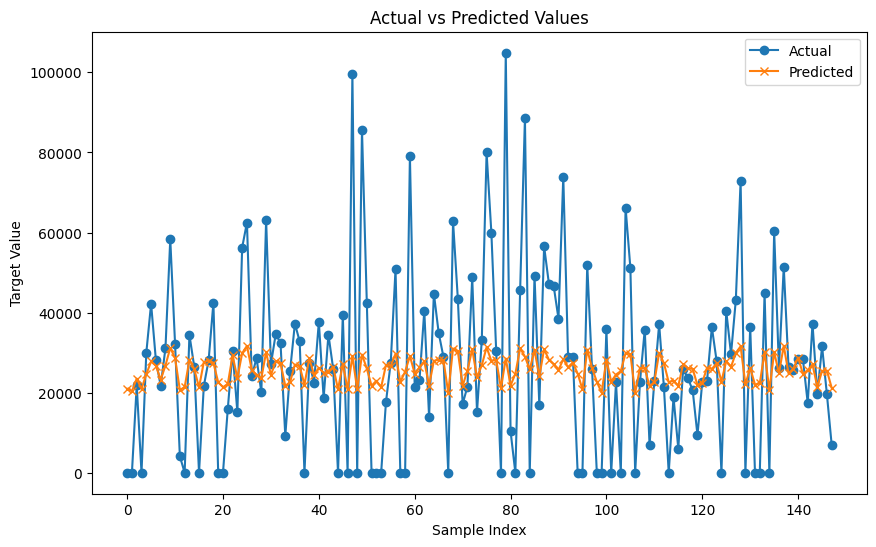

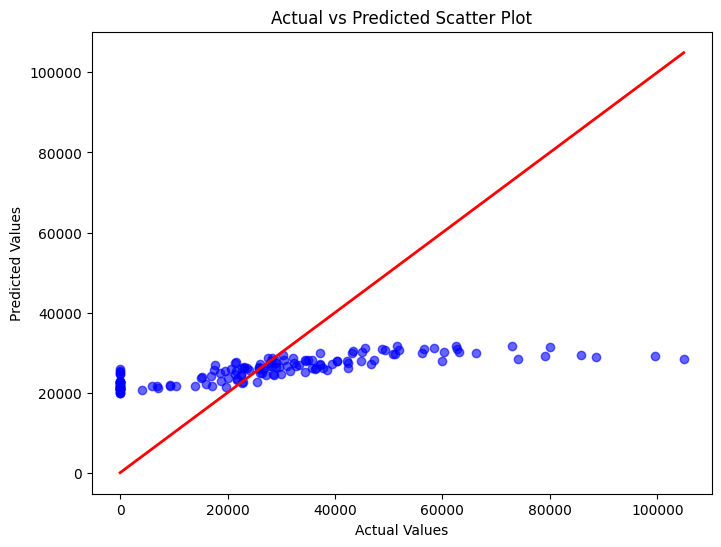

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#  Predict on test set
# y_pred = best_model.predict(X_test_scaled)

#  Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual': y_test.reset_index(drop=True),
    'Predicted': y_pred
})

#  Display first 10 rows
print(comparison_df.head(10))

# 4️⃣ Option 1: Line plot (Actual vs Predicted)
plt.figure(figsize=(10,6))
plt.plot(comparison_df['Actual'], label='Actual', marker='o')
plt.plot(comparison_df['Predicted'], label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.show()

#  Option 2: Scatter plot with y=x line (better for regression)
plt.figure(figsize=(8,6))
plt.scatter(comparison_df['Actual'], comparison_df['Predicted'], color='blue', alpha=0.6)
plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         [comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         color='red', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Scatter Plot')
plt.show()


In [57]:
data

,invoicedate,revenue,dayofweek,month,quarter,year,revenue_scaled,day,weekday
0,2009-12-01,54351.23,1,12,4,2009,0.270513,1,1
1,2009-12-02,63172.58,2,12,4,2009,0.314418,2,2
2,2009-12-03,73972.45,3,12,4,2009,0.368171,3,3
3,2009-12-04,40582.32,4,12,4,2009,0.201984,4,4
4,2009-12-05,9803.05,5,12,4,2009,0.048791,5,5
...,...,...,...,...,...,...,...,...,...
734,2011-12-05,88620.84,0,12,4,2011,0.441077,5,0
735,2011-12-06,56558.83,1,12,4,2011,0.281501,6,1
736,2011-12-07,75315.55,2,12,4,2011,0.374855,7,2
737,2011-12-08,82371.55,3,12,4,2011,0.409974,8,3
